In [5]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import mrmr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Full Data set from CFS (Correlation-based Feature Selection) 
dataset = pd.read_csv("D:/Blood_data_set.csv")

In [3]:
dataset.shape

(60, 15707)

In [4]:
from sklearn.model_selection import train_test_split
X2 = dataset.drop('Target', axis = 1)
y2 = dataset['Target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=20)

In [5]:
cor = X_train2.corr()

In [6]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train2, 0.8)
len(set(corr_features))

In [ ]:
X_train2=X_train2.drop(corr_features,axis=1)
X_test2=X_test2.drop(corr_features,axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
 
classifiers = [ SVC(probability=True),
                KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                ExtraTreesClassifier(),
                RandomForestClassifier(),
                GaussianNB(),
                MLPClassifier()
                ]

# Define a result table  (DataFrame)
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models 
for cls in classifiers:
    model = cls.fit(X_train2, y_train2)
    yproba2 = model.predict_proba(X_test2)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test2,  yproba2)
    auc = roc_auc_score(y_test2, yproba2)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [93]:
names = ["Linear_SVM", "Polynomial_SVM", "RBF_SVM","Sigmoid_SVM","Nearest_Neighbors","Decision_Tree",
         "Extra_Trees", "Random_Forest","Naive_Bayes","Neural_Net"]

classifiers = [
    SVC(kernel ='linear'),
    SVC(kernel ='poly'),
    SVC(kernel ='rbf'),
    SVC(kernel ='sigmoid'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier()]

In [94]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train2,y_train2)
    score = clf.score(X_test2, y_test2)
    y_predict2 = clf.predict(X_test2)
    print(confusion_matrix(y_test2, y_predict2))
    print(accuracy_score(y_test2, y_predict2))
    print(classification_report(y_test2, y_predict2))
    scores.append(score)

[[5 0]
 [2 5]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12

[[5 0]
 [7 0]]
0.4166666666666667
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

[[5 0]
 [7 0]]
0.4166666666666667
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21   

In [95]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.833333
1,Polynomial_SVM,0.416667
2,RBF_SVM,0.416667
3,Sigmoid_SVM,0.833333
4,Nearest_Neighbors,0.583333
5,Decision_Tree,0.583333
6,Extra_Trees,0.750000
7,Random_Forest,0.833333
8,Naive_Bayes,0.583333
9,Neural_Net,0.666667


In [96]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Linear_SVM,0.833333
1,Polynomial_SVM,0.416667
2,RBF_SVM,0.416667
3,Sigmoid_SVM,0.833333
4,Nearest_Neighbors,0.583333
5,Decision_Tree,0.583333
6,Extra_Trees,0.750000
7,Random_Forest,0.833333
8,Naive_Bayes,0.583333
9,Neural_Net,0.666667


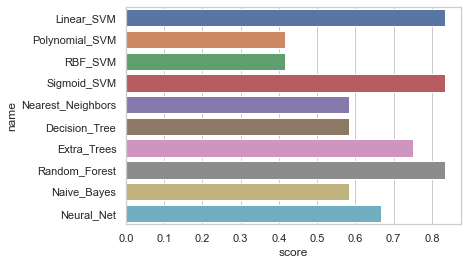

In [97]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [98]:
# Full Data set from MIFS (Mutual Information Feature Selection)
dataset_ig = pd.read_csv("D:/blood_data_set.csv")
X_ig = dataset_ig.drop('Target', axis = 1)
y_ig = dataset_ig['Target']

In [99]:
#from sklearn.model_selection import train_test_split
#X_ig = dataset.drop('Target', axis = 1)
#y_ig = dataset['Target']

X_train_ig, X_test_ig, y_train_ig, y_test_ig = train_test_split(X_ig, y_ig, test_size=0.2, random_state=20)

In [100]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_ig, y_train_ig)
mutual_info

array([0.        , 0.        , 0.10294407, ..., 0.        , 0.        ,
       0.01328812])

In [101]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_ig.columns
mutual_info.sort_values(ascending=False)

NAV1       0.319413
ZNF10      0.299539
ODC1       0.283637
RAC3       0.280847
PRPSAP1    0.274328
             ...   
EGFL8      0.000000
RHOV       0.000000
FAM163B    0.000000
TCF20      0.000000
Q73P46     0.000000
Length: 15706, dtype: float64

In [102]:
from sklearn.feature_selection import SelectKBest

In [103]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5).fit(X_train_ig, y_train_ig)
X_train_ig.columns[sel_five_cols.get_support()]

Index(['PRPSAP1', 'ODC1', 'ZNF10', 'NAV1', 'RAC3'], dtype='object')

In [104]:
X_ig = X_ig[['PRPSAP1', 'ODC1', 'ZNF10', 'NAV1', 'RAC3']]
#y_ig = y_ig['Target']

In [105]:
from sklearn.model_selection import train_test_split

X_train_ig, X_test_ig, y_train_ig, y_test_ig = train_test_split(X_ig, y_ig, test_size=0.2, random_state=20)

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_ig = sc.fit_transform(X_train_ig)
X_test_ig = sc.fit_transform(X_test_ig)

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
 
classifiers = [ SVC(probability=True),
                KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                ExtraTreesClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GaussianNB(),
                MLPClassifier()
                ]

# Define a result table  (DataFrame)
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models 
for cls in classifiers:
    model = cls.fit(X_train_ig, y_train_ig)
    yproba_ig = model.predict_proba(X_test_ig)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_ig,  yproba_ig)
    auc = roc_auc_score(y_test_ig, yproba_ig)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

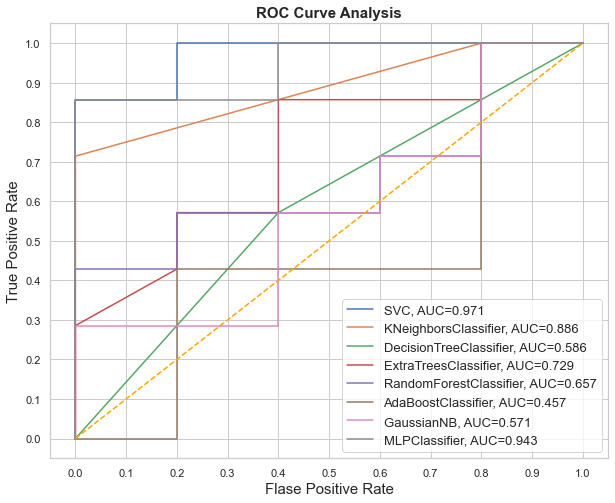

In [108]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [109]:
names = ["Linear_SVM", "Polynomial_SVM", "RBF_SVM","Sigmoid_SVM","Nearest_Neighbors","Decision_Tree",
         "Extra_Trees", "Random_Forest","Naive_Bayes","Neural_Net"]

classifiers = [
    SVC(kernel ='linear'),
    SVC(kernel ='poly'),
    SVC(kernel ='rbf'),
    SVC(kernel ='sigmoid'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier()]

In [110]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_ig,y_train_ig)
    score = clf.score(X_test_ig, y_test_ig)
    y_predict_ig = clf.predict(X_test_ig)
    print(confusion_matrix(y_test_ig, y_predict_ig))
    print(accuracy_score(y_test_ig, y_predict_ig))
    print(classification_report(y_test_ig, y_predict_ig))
    scores.append(score)

[[5 0]
 [3 4]]
0.75
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.57      0.73         7

    accuracy                           0.75        12
   macro avg       0.81      0.79      0.75        12
weighted avg       0.84      0.75      0.74        12

[[4 1]
 [6 1]]
0.4166666666666667
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.50      0.14      0.22         7

    accuracy                           0.42        12
   macro avg       0.45      0.47      0.38        12
weighted avg       0.46      0.42      0.35        12

[[5 0]
 [1 6]]
0.9166666666666666
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0

In [111]:
scores

[0.75,
 0.4166666666666667,
 0.9166666666666666,
 0.75,
 0.8333333333333334,
 0.75,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.8333333333333334]

In [112]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.750000
1,Polynomial_SVM,0.416667
2,RBF_SVM,0.916667
3,Sigmoid_SVM,0.750000
4,Nearest_Neighbors,0.833333
5,Decision_Tree,0.750000
6,Extra_Trees,0.583333
7,Random_Forest,0.583333
8,Naive_Bayes,0.583333
9,Neural_Net,0.833333


In [113]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Linear_SVM,0.750000
1,Polynomial_SVM,0.416667
2,RBF_SVM,0.916667
3,Sigmoid_SVM,0.750000
4,Nearest_Neighbors,0.833333
5,Decision_Tree,0.750000
6,Extra_Trees,0.583333
7,Random_Forest,0.583333
8,Naive_Bayes,0.583333
9,Neural_Net,0.833333


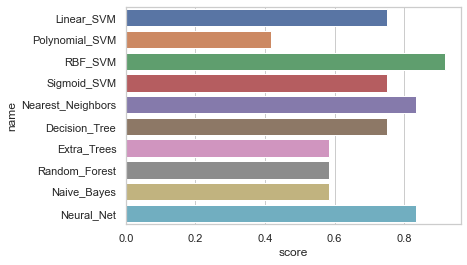

In [114]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [115]:
# Full Data set from mRMR (Minimum Redundancy Maximum Relevance)
dataset_ig = pd.read_csv("D:/blood_data_set.csv")
X_ig = dataset_ig.drop('Target', axis = 1)
y_ig = dataset_ig['Target']

In [116]:
# create some pandas data
from sklearn.datasets import make_classification
# select top 10 features using mRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X_ig, y=y_ig, K=5)

100%|████████████████████████████████████████████| 5/5 [00:07<00:00,  1.45s/it]


In [117]:
selected_features

['SPERT', 'WNT3', 'FAM203A', 'TNFRSF12A', 'RPS9']

In [118]:
X_mrmr = X_ig[['SPERT', 'WNT3', 'FAM203A', 'TNFRSF12A', 'RPS9']]
y_mrmr = dataset_ig['Target']
X_train_mrmr, X_test_mrmr, y_train_mrmr, y_test_mrmr = train_test_split(X_mrmr, y_mrmr, test_size=0.2, random_state=0)

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_mrmr = sc.fit_transform(X_train_mrmr)
X_test_mrmr = sc.fit_transform(X_test_mrmr)
X_mrmr = sc.fit_transform(X_mrmr)

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
 
classifiers = [ SVC(probability=True),
                KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                ExtraTreesClassifier(),
                RandomForestClassifier(),
                GaussianNB(),
                MLPClassifier()
                ]

# Define a result table  (DataFrame)
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models 
for cls in classifiers:
    model = cls.fit(X_train_mrmr, y_train_mrmr)
    yproba_mrmr = model.predict_proba(X_test_mrmr)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_mrmr,  yproba_mrmr)
    auc = roc_auc_score(y_test_mrmr, yproba_mrmr)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

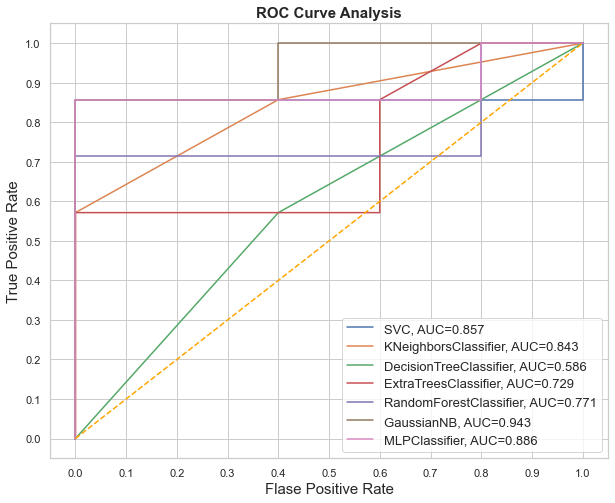

In [121]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [122]:
names = ["Linear_SVM", "Polynomial_SVM", "RBF_SVM","Sigmoid_SVM","Nearest_Neighbors","Decision_Tree",
         "Extra_Trees", "Random_Forest","Naive_Bayes","Neural_Net"]

classifiers = [
    SVC(kernel ='linear'),
    SVC(kernel ='poly'),
    SVC(kernel ='rbf'),
    SVC(kernel ='sigmoid'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier()]

In [123]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_mrmr,y_train_mrmr)
    score = clf.score(X_test_mrmr, y_test_mrmr)
    y_predict_mrmr = clf.predict(X_test_mrmr)
    print(confusion_matrix(y_test_mrmr, y_predict_mrmr))
    print(accuracy_score(y_test_mrmr, y_predict_mrmr))
    print(classification_report(y_test_mrmr, y_predict_mrmr))
    scores.append(score)

[[5 0]
 [3 4]]
0.75
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.57      0.73         7

    accuracy                           0.75        12
   macro avg       0.81      0.79      0.75        12
weighted avg       0.84      0.75      0.74        12

[[3 2]
 [1 6]]
0.75
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12

[[5 0]
 [4 3]]
0.6666666666666666
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.43      0.60         7

    accuracy                           0.67        12
   macro avg       0.78      0.71      0.66        12


In [124]:
scores

[0.75,
 0.75,
 0.6666666666666666,
 0.8333333333333334,
 0.75,
 0.5833333333333334,
 0.75,
 0.8333333333333334,
 0.75,
 0.75]

In [125]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.750000
1,Polynomial_SVM,0.750000
2,RBF_SVM,0.666667
3,Sigmoid_SVM,0.833333
4,Nearest_Neighbors,0.750000
5,Decision_Tree,0.583333
6,Extra_Trees,0.750000
7,Random_Forest,0.833333
8,Naive_Bayes,0.750000
9,Neural_Net,0.750000


In [126]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Linear_SVM,0.750000
1,Polynomial_SVM,0.750000
2,RBF_SVM,0.666667
3,Sigmoid_SVM,0.833333
4,Nearest_Neighbors,0.750000
5,Decision_Tree,0.583333
6,Extra_Trees,0.750000
7,Random_Forest,0.833333
8,Naive_Bayes,0.750000
9,Neural_Net,0.750000


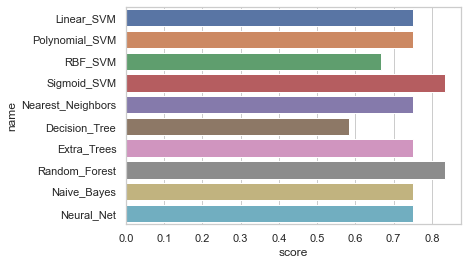

In [127]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [7]:
# Dataset prepared with Log2foldchange < -1 and p-value less than 0.05
dataset_ig = pd.read_csv("D:/g1_dr-1.csv")
X_ig = dataset_ig.drop('Target', axis = 1)
y_ig = dataset_ig['Target']
X_train_ig, X_test_ig, y_train_ig, y_test_ig = train_test_split(X_ig, y_ig, test_size=0.3, random_state=0)

In [8]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_ig, y_train_ig)
mutual_info

array([0.15939087, 0.15694938, 0.05250035, 0.1325603 , 0.14820906,
       0.14142687, 0.11425249, 0.17989283, 0.21120362, 0.12213581,
       0.11613148, 0.09884163])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_ig.columns
mutual_info.sort_values(ascending=False)

RPL17      0.211204
RPL31      0.179893
RPS7       0.159391
RPL23      0.156949
RPL34      0.148209
RPL34.1    0.141427
RPL26      0.132560
RPL23.1    0.122136
RPL26.1    0.116131
COMMD6     0.114252
RPL7       0.098842
UQCRB      0.052500
dtype: float64

In [10]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_ig.columns
mutual_info.sort_values(ascending=False)

RPL17      0.211204
RPL31      0.179893
RPS7       0.159391
RPL23      0.156949
RPL34      0.148209
RPL34.1    0.141427
RPL26      0.132560
RPL23.1    0.122136
RPL26.1    0.116131
COMMD6     0.114252
RPL7       0.098842
UQCRB      0.052500
dtype: float64

In [11]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5).fit(X_train_ig, y_train_ig)
X_train_ig.columns[sel_five_cols.get_support()]

Index(['RPS7', 'RPL23', 'RPL34', 'RPL31', 'RPL17'], dtype='object')

In [12]:
X_ig = X_ig[['RPS7', 'RPL23', 'RPL34', 'RPL31', 'RPL17']]

Feature: 0, Score: 0.22617
Feature: 1, Score: 0.19026
Feature: 2, Score: 0.20048
Feature: 3, Score: 0.23952
Feature: 4, Score: 0.14357


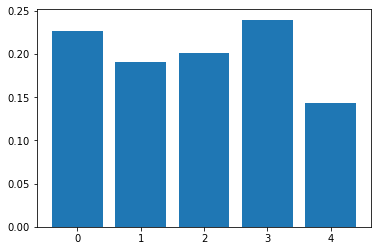

In [13]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
    
model = RandomForestClassifier()
# fit the model
model.fit(X_ig, y_ig)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [14]:
X_ig = X_ig[['RPS7', 'RPL31']]

In [15]:
from sklearn.model_selection import train_test_split

X_train_ig, X_test_ig, y_train_ig, y_test_ig = train_test_split(X_ig, y_ig, test_size=0.3, random_state=20)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train_ig = sc.fit_transform(X_train_ig)
X_test_ig = sc.fit_transform(X_test_ig)

Text(0.5, 1.0, 'Precision-Recall curve')

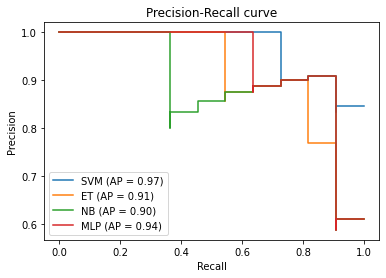

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import matthews_corrcoef

svm_classifier=  SVC()
knn_classifier=  KNeighborsClassifier()
DT_classifier =  DecisionTreeClassifier()
ET_classifier =  ExtraTreesClassifier()
RF_classifier =  RandomForestClassifier()
nb_classifier =  GaussianNB()
MLP_classifier =  MLPClassifier()


svm_classifier.fit(X_train_ig,y_train_ig)
knn_classifier.fit(X_train_ig,y_train_ig)
DT_classifier.fit(X_train_ig,y_train_ig)
ET_classifier.fit(X_train_ig,y_train_ig)
RF_classifier.fit(X_train_ig,y_train_ig)
nb_classifier.fit(X_train_ig,y_train_ig)
MLP_classifier.fit(X_train_ig,y_train_ig)


plot_precision_recall_curve(svm_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "SVM")
#plot_precision_recall_curve(knn_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "KNN")
#plot_precision_recall_curve(DT_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "DT")
plot_precision_recall_curve(ET_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "ET")
#plot_precision_recall_curve(RF_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "RF")
plot_precision_recall_curve(nb_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "NB")
plot_precision_recall_curve(MLP_classifier, X_test_ig, y_test_ig, ax = plt.gca(),name = "MLP")

plt.title('Precision-Recall curve')

In [18]:
names = ["SVM","Nearest_Neighbors","Decision_Tree",
         "Extra_Trees", "Random_Forest","Naive_Bayes","Neural_Net"]

classifiers = [
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    MLPClassifier()]

In [19]:
from sklearn.metrics import matthews_corrcoef
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_ig,y_train_ig)
    score = clf.score(X_test_ig, y_test_ig)
    y_predict_ig = clf.predict(X_test_ig)
    print(confusion_matrix(y_test_ig, y_predict_ig))
    print(accuracy_score(y_test_ig, y_predict_ig))
    print(classification_report(y_test_ig, y_predict_ig))
    scores.append(score)
#calculate Matthews correlation coefficient
matthews_corrcoef(y_test_ig, y_predict_ig)


[[6 1]
 [2 9]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.90      0.82      0.86        11

    accuracy                           0.83        18
   macro avg       0.82      0.84      0.83        18
weighted avg       0.84      0.83      0.83        18

[[7 0]
 [3 8]]
0.8333333333333334
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.73      0.84        11

    accuracy                           0.83        18
   macro avg       0.85      0.86      0.83        18
weighted avg       0.88      0.83      0.83        18

[[6 1]
 [4 7]]
0.7222222222222222
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.88      0.64      0.74        11

    accuracy                           0.72        18
   macro avg       0.74   

0.5698028822981898

In [20]:
scores

[0.8333333333333334,
 0.8333333333333334,
 0.7222222222222222,
 0.8333333333333334,
 0.7777777777777778,
 0.8888888888888888,
 0.7777777777777778]

In [21]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,SVM,0.833333
1,Nearest_Neighbors,0.833333
2,Decision_Tree,0.722222
3,Extra_Trees,0.833333
4,Random_Forest,0.777778
5,Naive_Bayes,0.888889
6,Neural_Net,0.777778


In [22]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,SVM,0.833333
1,Nearest_Neighbors,0.833333
2,Decision_Tree,0.722222
3,Extra_Trees,0.833333
4,Random_Forest,0.777778
5,Naive_Bayes,0.888889
6,Neural_Net,0.777778


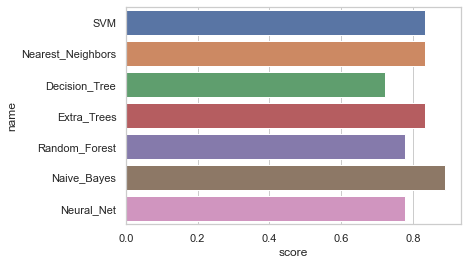

In [23]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
 
classifiers = [ SVC(probability=True),
                KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                ExtraTreesClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GaussianNB(),
                MLPClassifier()
                ]

# Define a result table  (DataFrame)
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models 
for cls in classifiers:
    model = cls.fit(X_train_ig, y_train_ig)
    yproba_ig = model.predict_proba(X_test_ig)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_ig,  yproba_ig)
    auc = roc_auc_score(y_test_ig, yproba_ig)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

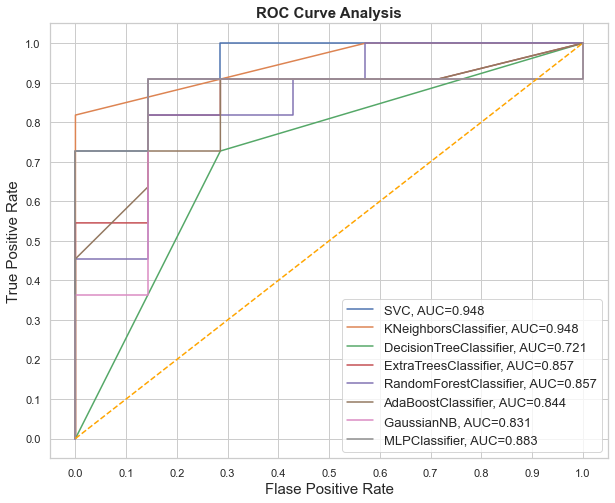

In [25]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()